In [2]:
import pandas as pd
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 
import dataframe_image as dfi


In [3]:
SoftSkillsDF = pd.read_excel('DataAnalystSoftSkillsNEW.xlsx')

SoftSkillsDF.head(5)

,Count,JobTitle,Salary Estimate,Company Name,Company Rating,Location,Headquarters,Size,Founded,Type of ownership,...,TimeManAdvert,NumOfTimeManagementSkillsIncluded,InterpersonalSkillsIncluded,InterpersonalSkillsDetails,InterpersonalAdverts,NumOfInterpersonalSkillsIncluded,SoftSkills,SoftSkillsAdvert,NumberofSoftSkillsActual,Number of SoftSkillsRange
0,0,Analyst IV Systems - Data Engineering,$68K-$87K (Glassdoor est.),"Retail Business Services, LLC",3.9,"Chicago, IL","Salisbury, NC",1001 to 5000 employees,Unknown / Non-Applicable,Company - Public,...,1,1,True,"Critical-thinking, Attention to Detail",1,2,1,5,8,5 to 10 Soft Skills Included in JD
1,1,Data Visualization Project Manager/ Business A...,$50K-$93K (Glassdoor est.),Trillium Solutions Group,4.8,"Horsham, PA","Highland Park, IL",1 to 50 employees,2002,Private Practice / Firm,...,1,1,True,"Interpersonal, Attention to Detail, Networking",1,3,1,5,13,11 or more Soft Skills included in the JD
2,2,"Business Analyst with Data Governance ,IDQ exp",$35K-$67K (Glassdoor est.),SM LOgics Inc,Unknown / Non-Applicable,"Fort Worth, TX","Carrollton, TX",Unknown,Unknown / Non-Applicable,Company - Public,...,0,0,True,Interpersonal,1,1,1,2,2,1 to 4 Soft Skills Included in JD
3,3,Lead Data Analyst,$41K-$78K (Glassdoor est.),Attentive,Unknown / Non-Applicable,"New York, NY","Braga, Portugal",1 to 50 employees,Unknown / Non-Applicable,Company - Private,...,1,1,False,No matches,0,0,1,4,6,5 to 10 Soft Skills Included in JD
4,4,Data Systems Analyst (7199U,$65K-$120K (Glassdoor est.),University of California Berkeley,4.1,"Berkeley, CA","Berkeley, CA",10000+ employees,1682,College / University,...,1,1,True,"Critical-thinking, Attention to Detail",1,2,1,4,5,5 to 10 Soft Skills Included in JD


In [4]:
# Counting the number of Job Adverts in the Data Set
NumberofAdverts = SoftSkillsDF['JobTitle'].count()

In [5]:
#Calculating the amount of Job Adverts that CONTAIN Soft Skills
SoftSkillsTrue = SoftSkillsDF['SoftSkills'].sum()


#Calculating the amount of Job Adverts that do NOT CONTAIN Soft Skills
SoftskillsFalse = (NumberofAdverts-SoftSkillsTrue)

In [6]:
#Creating a panda data frame to display the results in a table.

HighLevel_Summary = pd.DataFrame({  "Total Job Adverts": NumberofAdverts,
                                    "Job Adverts that contain Soft Skills":SoftSkillsTrue,
                                    "Job Adverts that do NOT contain Soft Skills": SoftskillsFalse
                                  
}, index=[0])

#Displaying the results of my High Level Analysis 

HighLevel_Summary

,Total Job Adverts,Job Adverts that contain Soft Skills,Job Adverts that do NOT contain Soft Skills
0,2252,1949,303


In [7]:
#Exporting my table as a PNG so that it can be used in my powerpoint presentation
dfi.export(HighLevel_Summary, 
           "HighLevel.png",
           table_conversion="matplotlib"
          )

In [8]:
#Calculating the percentage of adverts that contain Soft Skill Keywords to go into a statistics High Level Summary table
SoftSkillTrueStats = (SoftSkillsTrue / NumberofAdverts) * 100
SoftSkillFalseStats = (SoftskillsFalse/ NumberofAdverts) * 100

In [9]:
#Creating a high level stats table
HighLevel_Stats = pd.DataFrame({    "% Of Adverts Containing Soft Skills": f"{SoftSkillTrueStats:.2f}%",
                                    "% Of Adverts NOT Containing Soft Skills": f"{SoftSkillFalseStats:.2f}%",
                                
}, index=[0])

HighLevel_Stats

,% Of Adverts Containing Soft Skills,% Of Adverts NOT Containing Soft Skills
0,86.55%,13.45%


In [10]:
#Exporting my High Level stats table as a PNG
dfi.export(HighLevel_Stats, 
           "HighLevelstats.png",
           table_conversion="matplotlib"
          )

<Figure size 720x504 with 0 Axes>

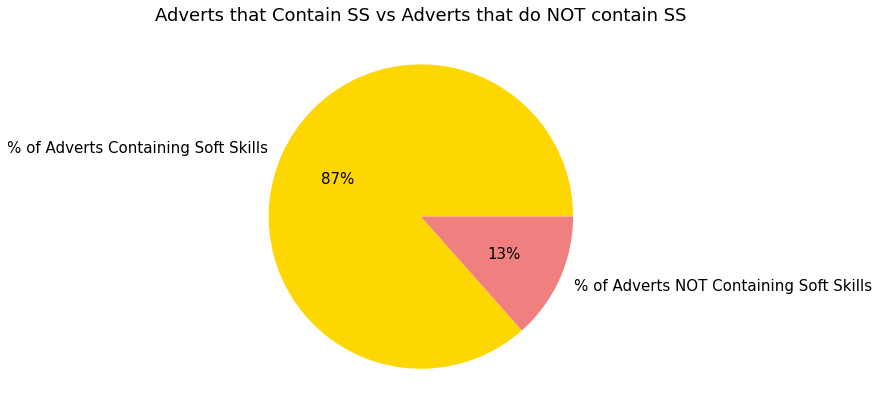

In [19]:
# creating the dataset to create a graph for my High Level statistical analyis
HighLevelSS = { '% of Adverts Containing Soft Skills': 1949,
                '% of Adverts NOT Containing Soft Skills': 303
                }
 
Categories = list(HighLevelSS.keys())
data = list(HighLevelSS.values())
 
fig = plt.figure(figsize=(10, 7))
 

# Creating my Pie Chart
colors = ['Gold','lightcoral']
fig = plt.figure(figsize =(10, 7))
plt.title('Adverts that Contain SS vs Adverts that do NOT contain SS')
plt.pie(data, labels = Categories, autopct='%1.0f%%', colors=colors)
plt.rcParams.update({'font.size': 15}) 
    
plt.show()

In [21]:
#Exporting my High Level stats table as a PNG
dfi.export(HighLevel_Stats, 
           "HighLevelstats.png",
           table_conversion="matplotlib"
          )

In [22]:
# Looking at each Soft Skill Category to see which one is the most popular with employers 

#Counting the amount of adverts that contain Soft Skills by Category

CommSkills = SoftSkillsDF['CommSkillsAdvert'].sum()
WorkEthicSkills = SoftSkillsDF['WorkEthicAdvert'].sum()
TeamWorkSkills = SoftSkillsDF['TeamWorkAdvert'].sum()
TimeManSkills = SoftSkillsDF['TimeManAdvert'].sum()
InterSkills = SoftSkillsDF['InterpersonalAdverts'].sum()

In [23]:
# Creating a Panda Dataframe to store my results

Category_Summary = pd.DataFrame({ "Communication Soft Skills":CommSkills,
                                  "Work Ethic Soft Skills":WorkEthicSkills,
                                  "Team Work Soft Skills":TeamWorkSkills,
                                  "Time Management Soft Skills":TimeManSkills,
                                  "Interpetsonal Soft Skills":InterSkills
    
}, index=[0])

# Displaying my high level category summary results an hiding the index
Category_Summary.style.hide_index()

/var/folders/h7/tv1726bn3pj1th3_qvfhtd880000gn/T/ipykernel_5175/1983074208.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  Category_Summary.style.hide_index()


Communication Soft Skills,Work Ethic Soft Skills,Team Work Soft Skills,Time Management Soft Skills,Interpetsonal Soft Skills
1265,1237,978,1145,850


In [24]:
# Exporting my Category Summary stats table as a PNG

dfi.export(Category_Summary, 
           "CategorySummary.png",
           table_conversion="matplotlib"
          )

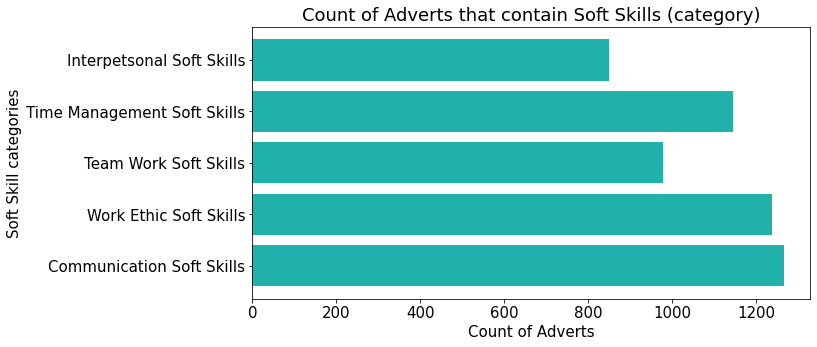

In [29]:
# creating the dataset to summarise the count of adverts per Soft Skill Category
SSCategoriers = {'Communication Soft Skills': 1265, 
                 'Work Ethic Soft Skills': 1237, 
                 'Team Work Soft Skills': 978,
                 'Time Management Soft Skills': 1145,
                 'Interpetsonal Soft Skills': 850
                }
 
Categories = list(SSCategoriers.keys())
values = list(SSCategoriers.values())
 
fig = plt.figure(figsize=(10, 5))
 
# creating the bar plot
plt.barh(Categories, values, color='lightseagreen')
plt.xlabel("Count of Adverts")
plt.ylabel("Soft Skill categories")
plt.title("Count of Adverts that contain Soft Skills (category)")

# Displaying the bar plot
plt.show()

In [30]:
# Calculating the % of Adverts that contain keywords within each Soft Skill Category
CommSkillStats = (CommSkills / NumberofAdverts) * 100
WorkEthicStats = (WorkEthicSkills / NumberofAdverts) * 100
TeamWorkStats = (TeamWorkSkills / NumberofAdverts) * 100
TimeManStats = (TimeManSkills / NumberofAdverts) * 100
InterStats = (InterSkills / NumberofAdverts) * 100

In [31]:
# Creating a high level stats table for each category
Category_Stats = pd.DataFrame({    "Communication Soft Skills": f"{CommSkillStats:.2f}%",
                                   "Work Ethic Soft Skills": f"{WorkEthicStats:.2f}%",
                                   "Team Work Soft Skills": f"{TeamWorkStats:.2f}%",
                                   "Time Management Soft Skills": f"{TimeManStats:.2f}%",
                                   "Interpersonal Soft Skills": f"{InterStats:.2f}%", 
                                
}, index=[0])

# Displaying my table
Category_Stats.style.hide_index()

/var/folders/h7/tv1726bn3pj1th3_qvfhtd880000gn/T/ipykernel_5175/912589361.py:11: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  Category_Stats.style.hide_index()


Communication Soft Skills,Work Ethic Soft Skills,Team Work Soft Skills,Time Management Soft Skills,Interpersonal Soft Skills
56.17%,54.93%,43.43%,50.84%,37.74%


In [32]:
# Exporting the category statsa table as an image to add to my presentation

dfi.export(Category_Stats, 
           "CategoryStats.png",
           table_conversion="matplotlib"
          )

In [62]:
# Grouping the data set by 'Sector' so that i can analyse which Soft Skills employers favour the most by Sector

SectorGroups = SoftSkillsDF.set_index("Sector").groupby(["Sector"])

SectorCount = SectorGroups['JobTitle'].count()
Ad = SectorGroups['SoftSkills'].sum()
AdsActual = SectorGroups['NumberofSoftSkillsActual'].sum()
AdsAvg = SectorGroups['NumberofSoftSkillsActual'].mean()

In [65]:
# Creating a panda dataframe to display my results in a table

SectorSummary = pd.DataFrame({"Job Adverts":SectorCount,
                     "Adverts containing Soft Skills":Ad,
                     "Soft Skills Keywords Identified":AdsActual,
                     "Average Soft Skills per Advert": AdsAvg,
    
})

# Rounding my data to 2 decimal places
pd.options.display.float_format = "{:,.2f}".format


# Displaying my data
SectorSummary

,Job Adverts,Adverts containing Soft Skills,Soft Skills Keywords Identified,Average Soft Skills per Advert
Sector,,,,
Accounting & Legal,43,29,69,1.60
Aerospace & Defense,22,19,64,2.91
"Arts, Entertainment & Recreation",7,7,29,4.14
Biotech & Pharmaceuticals,33,33,129,3.91
Business Services,524,424,1417,2.70
"Construction, Repair & Maintenance",16,14,48,3.00
Consumer Services,14,11,24,1.71
Education,52,49,240,4.62
Finance,169,165,741,4.38


In [66]:
# Sorting the data frame descending by Adverts that contain the most soft skills by sector
test.sort_values(by=['Adverts containing Soft Skills'], ascending=False)

,Job Adverts,Adverts containing Soft Skills,Soft Skills Keywords Identified,Average Soft Skills per Advert
Sector,,,,
Information Technology,569,484,1634,2.87
Business Services,524,424,1417,2.70
Unknown,353,297,1122,3.18
Finance,169,165,741,4.38
Health Care,151,143,648,4.29
Education,52,49,240,4.62
Insurance,51,48,182,3.57
Retail,38,37,192,5.05
Media,42,36,186,4.43


In [79]:
# Identifying the top sectors using heat map
test.style.background_gradient()

,Job Adverts,Adverts containing Soft Skills,Soft Skills Keywords Identified,Average Soft Skills per Advert
Sector,,,,
Accounting & Legal,43,29,69,1.604651
Aerospace & Defense,22,19,64,2.909091
"Arts, Entertainment & Recreation",7,7,29,4.142857
Biotech & Pharmaceuticals,33,33,129,3.909091
Business Services,524,424,1417,2.704198
"Construction, Repair & Maintenance",16,14,48,3.000000
Consumer Services,14,11,24,1.714286
Education,52,49,240,4.615385
Finance,169,165,741,4.384615


In [68]:

dfi.export(test.style.background_gradient(), 
           "HeatMap2.png",
           table_conversion="matplotlib"
          )

/Users/aodhnaitelliott/opt/anaconda3/lib/python3.9/site-packages/dataframe_image/_pandas_accessor.py:69: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = '<div>' + obj.render() + '</div>'


In [69]:
# Identifying the the top 6 sectors by the count of adverts that contain soft skills
DrillDownSector = test.nlargest(6, ['Adverts containing Soft Skills'])

In [82]:
SectorDF = SoftSkillsDF[SoftSkillsDF.Sector.isin(["Information Technology", 
                                                  "Business Services", 
                                                  "Unknown", 
                                                  "Finance", 
                                                  "Health Care"])]

In [85]:
SectorSS_Cats = SectorDF.set_index("Sector").groupby(["Sector"])

AdCount = SectorSS_Cats['JobTitle'].count()
AdCountComs = SectorSS_Cats['CommSkillsAdvert'].sum()
AdCountTeamWork = SectorSS_Cats['TeamWorkAdvert'].sum()
AdCountWorkEthic = SectorSS_Cats['WorkEthicAdvert'].sum()
AdCountTimeMan = SectorSS_Cats['TimeManAdvert'].sum()
AdCountInter = SectorSS_Cats['InterpersonalAdverts'].sum()


In [86]:
SectorTop6 = pd.DataFrame({
                         "Communication Soft Skills":AdCountComs,
                         "Team Work Soft Skills":AdCountTeamWork,
                         "Work Ethic Soft Skills":AdCountWorkEthic,
                         "Time Management Soft Skills":AdCountTimeMan,
                         "Interpersonal Soft Skills":AdCountInter
})


SectorTop6.style.highlight_max(axis=1).highlight_null(null_color="lightcyan")

,Communication Soft Skills,Team Work Soft Skills,Work Ethic Soft Skills,Time Management Soft Skills,Interpersonal Soft Skills
Sector,,,,,
Business Services,284,194,243,229,155
Finance,118,86,122,108,75
Health Care,94,84,110,95,78
Information Technology,283,223,267,248,226
Unknown,193,142,187,169,123


In [87]:
KWCountComs = SectorSS_Cats['NumOfComSkillsIncluded'].sum()
KWCountTeamWork = SectorSS_Cats['NumOfTeamworkSkillsIncluded'].sum()
KWCountWorkEthic = SectorSS_Cats['NumOfWorkEthicSkillsIncluded'].sum()
KWCountTimeMan = SectorSS_Cats['NumOfTimeManagementSkillsIncluded'].sum()
KWCountInter = SectorSS_Cats['NumOfInterpersonalSkillsIncluded'].sum()

In [88]:
SectorKW = pd.DataFrame({"Communication Skills Key Words":KWCountComs,
                         "Team Work Skills Key Words":KWCountTeamWork,
                         "Work Ethic Skills Key Words":KWCountWorkEthic,
                         "Time Management Skills Key Words":KWCountTimeMan,
                         "Interpersonal Skills Key Words":KWCountInter                      
    
})


SectorKW.style.highlight_min(axis=1).highlight_null(null_color="")

,Communication Skills Key Words,Team Work Skills Key Words,Work Ethic Skills Key Words,Time Management Skills Key Words,Interpersonal Skills Key Words
Sector,,,,,
Business Services,302,282,354,303,176
Finance,127,130,223,152,109
Health Care,99,129,184,133,103
Information Technology,297,341,396,337,263
Unknown,209,228,301,234,150


In [89]:
InformationTechnology = SectorKW.loc['Information Technology']

InformationTechnology
                      

Communication Skills Key Words      297
Team Work Skills Key Words          341
Work Ethic Skills Key Words         396
Time Management Skills Key Words    337
Interpersonal Skills Key Words      263
Name: Information Technology, dtype: int64

<Figure size 1008x504 with 0 Axes>

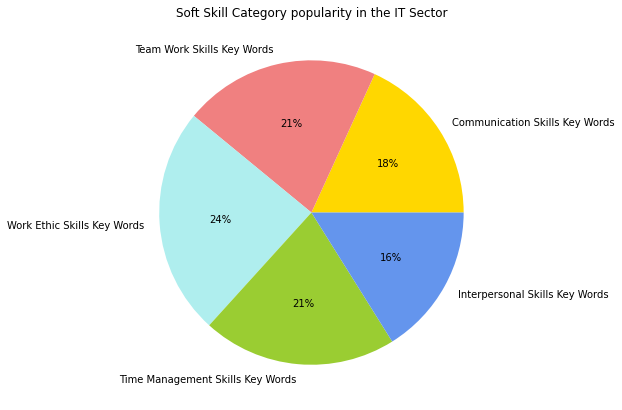

In [90]:
# creating the dataset for my pie chart for the IT department
itPIECHART = {'Communication Skills Key Words': 297,
               'Team Work Skills Key Words': 341,
               'Work Ethic Skills Key Words': 396,
               'Time Management Skills Key Words': 337,
               'Interpersonal Skills Key Words': 263
                }
 
Categories = list(itPIECHART.keys())
data = list(itPIECHART.values())
 
fig = plt.figure(figsize=(14, 7))
 

# Creating my Pie Chart
colors = ['Gold','lightcoral','paleturquoise','yellowgreen','cornflowerblue']
fig = plt.figure(figsize =(10, 7))
plt.title('Soft Skill Category popularity in the IT Sector')
plt.pie(data, labels = Categories, autopct='%1.0f%%', colors=colors)
plt.rcParams.update({'font.size': 10})
    
plt.show()


In [157]:
PlotFinance = SectorKW.loc['Finance']

PlotFinance

Communication Skills Key Words      127
Team Work Skills Key Words          130
Work Ethic Skills Key Words         223
Time Management Skills Key Words    152
Interpersonal Skills Key Words      109
Name: Finance, dtype: int64

<Figure size 1008x504 with 0 Axes>

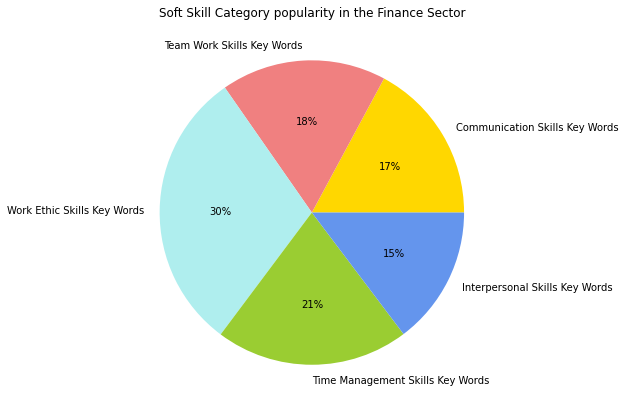

In [91]:
# creating the dataset for my pie chart for the Finance Sector
financePIECHART = {'Communication Skills Key Words': 127,
               'Team Work Skills Key Words': 130,
               'Work Ethic Skills Key Words': 223,
               'Time Management Skills Key Words': 152,
               'Interpersonal Skills Key Words': 109
                }
 
Categories = list(financePIECHART.keys())
data = list(financePIECHART.values())
 
fig = plt.figure(figsize=(14, 7))
 

# Creating my Pie Chart
colors = ['Gold','lightcoral','paleturquoise','yellowgreen','cornflowerblue']
fig = plt.figure(figsize =(10, 7))
plt.title('Soft Skill Category popularity in the Finance Sector')
plt.pie(data, labels = Categories, autopct='%1.0f%%', colors=colors)
plt.rcParams.update({'font.size': 10})
    
plt.show()




In [94]:
PlotBusiness = SectorKW.loc['Business Services']

PlotBusiness

Communication Skills Key Words      302
Team Work Skills Key Words          282
Work Ethic Skills Key Words         354
Time Management Skills Key Words    303
Interpersonal Skills Key Words      176
Name: Business Services, dtype: int64

<Figure size 1008x504 with 0 Axes>

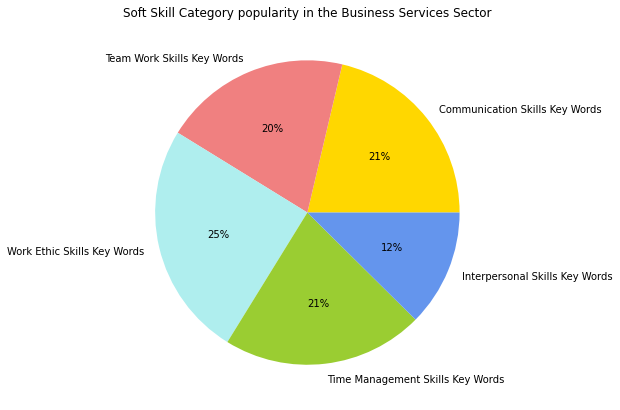

In [99]:
# creating the dataset for my pie chart for the Business Services
businessPIECHART = {'Communication Skills Key Words': 302,
               'Team Work Skills Key Words': 282,
               'Work Ethic Skills Key Words': 354,
               'Time Management Skills Key Words': 303,
               'Interpersonal Skills Key Words': 176
                }
 
Categories = list(businessPIECHART.keys())
data = list(businessPIECHART.values())
 
fig = plt.figure(figsize=(14, 7))
 

# Creating my Pie Chart
colors = ['Gold','lightcoral','paleturquoise','yellowgreen','cornflowerblue']
fig = plt.figure(figsize =(10, 7))
plt.title('Soft Skill Category popularity in the Business Services Sector')
plt.pie(data, labels = Categories, autopct='%1.0f%%', colors=colors)
plt.rcParams.update({'font.size': 10})
  

# Displaying my Business Services pie chart
plt.show()



In [100]:
HealthCare = SectorKW.loc['Health Care']

HealthCare
                      

Communication Skills Key Words       99
Team Work Skills Key Words          129
Work Ethic Skills Key Words         184
Time Management Skills Key Words    133
Interpersonal Skills Key Words      103
Name: Health Care, dtype: int64

<Figure size 1008x504 with 0 Axes>

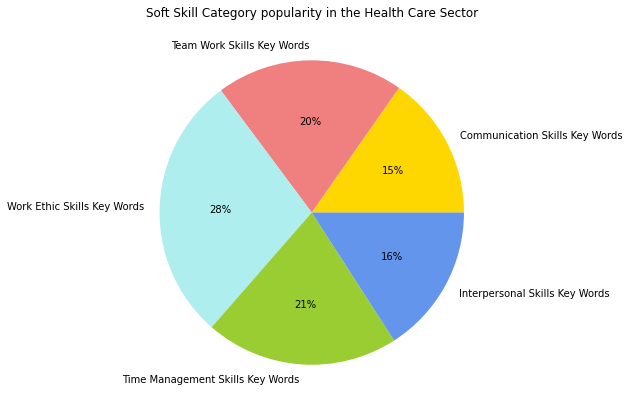

In [102]:
# creating the dataset for my pie chart for the Health Care
healthPIECHART = {'Communication Skills Key Words': 99,
               'Team Work Skills Key Words': 129,
               'Work Ethic Skills Key Words': 184,
               'Time Management Skills Key Words': 133,
               'Interpersonal Skills Key Words': 103
                }
 
Categories = list(healthPIECHART.keys())
data = list(healthPIECHART.values())
 
fig = plt.figure(figsize=(14, 7))
 

# Creating my Pie Chart
colors = ['Gold','lightcoral','paleturquoise','yellowgreen','cornflowerblue']
fig = plt.figure(figsize =(10, 7))
plt.title('Soft Skill Category popularity in the Health Care Sector')
plt.pie(data, labels = Categories, autopct='%1.0f%%', colors=colors)
plt.rcParams.update({'font.size': 10})
  

# Displaying my Health Services pie chart
plt.show()



In [103]:
UnknownSector = SectorKW.loc['Unknown']

UnknownSector          

Communication Skills Key Words      209
Team Work Skills Key Words          228
Work Ethic Skills Key Words         301
Time Management Skills Key Words    234
Interpersonal Skills Key Words      150
Name: Unknown, dtype: int64

<Figure size 1008x504 with 0 Axes>

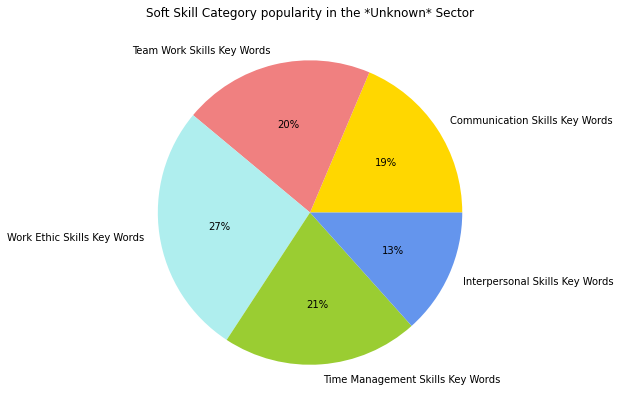

In [107]:
# creating the dataset for my pie chart for the 'Unknown sectors'
unknownPIECHART = {'Communication Skills Key Words': 209,
               'Team Work Skills Key Words': 228,
               'Work Ethic Skills Key Words': 301,
               'Time Management Skills Key Words': 234,
               'Interpersonal Skills Key Words': 150
                }
 
Categories = list(unknownPIECHART.keys())
data = list(unknownPIECHART.values())
 
fig = plt.figure(figsize=(14, 7))
 

# Creating my Pie Chart
colors = ['Gold','lightcoral','paleturquoise','yellowgreen','cornflowerblue']
fig = plt.figure(figsize =(10, 7))
plt.title('Soft Skill Category popularity in the *Unknown* Sector')
plt.pie(data, labels = Categories, autopct='%1.0f%%', colors=colors)
plt.rcParams.update({'font.size': 10})
  

# Displaying my Unknown sector pie chart
plt.show()

